In [1]:
# Import the random module.
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import requests
import requests

# Importing API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime
import time

# Importing Stats library
from scipy.stats import linregress

# Import gmaps
import gmaps

# Import the API key.
from config import g_key

In [2]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [3]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

touros br
qaanaaq gl
avarua ck
yellowknife ca
dikson ru
yellowknife ca
saint-augustin ca
qaanaaq gl
norman wells ca
gladstone au
east london za
waipawa nz
bethel us
herat af
rikitea pf
vila franca do campo pt
beniganj in
cape town za
tambacounda sn
saint-philippe re
banda aceh id
qaanaaq gl
inhambane mz
albany au
mataura pf
xam nua la
victoria sc
khatanga ru
rikitea pf
hamilton bm
mantua cu
talnakh ru
victoria sc
ponta do sol cv
kodiak us
juegang cn
ribeira grande pt
hermanus za
tasiilaq gl
albany au
rawson ar
punta arenas cl
port elizabeth za
comodoro rivadavia ar
severo-kurilsk ru
attawapiskat ca
butaritari ki
kruisfontein za
rikitea pf
warqla dz
belushya guba ru
adrar dz
sabancuy mx
punta arenas cl
lasa cn
yunyang cn
avarua ck
ushuaia ar
punta arenas cl
kapaa us
bredasdorp za
barrow us
mar del plata ar
aksarka ru
iwaki jp
khatanga ru
alice springs au
albany au
agadez ne
souillac mu
butaritari ki
kodiak us
albany au
arraial do cabo br
vanimo pg
moree au
hithadhoo mv
avarua ck
la roma

pacific grove us
hermanus za
carnarvon au
sao filipe cv
upernavik gl
khonsa in
saskylakh ru
busselton au
kapaa us
barrow us
harwich us
barentsburg sj
marzuq ly
ushuaia ar
sala se
bredasdorp za
rikitea pf
yulara au
vaini to
hami cn
severo-kurilsk ru
parauna br
taolanaro mg
kampot kh
atuona pf
kavieng pg
esperance au
batagay-alyta ru
japura br
san pedro ar
berlevag no
huarmey pe
upernavik gl
lagoa pt
luderitz na
awbari ly
barrow us
severo-kurilsk ru
busselton au
nong ki th
rikitea pf
jamestown sh
grand river south east mu
fortuna us
klaksvik fo
nicoya cr
nome us
marcona pe
avarua ck
macusani pe
kamaishi jp
port blair in
kapaa us
rikitea pf
vardo no
rikitea pf
kyakhta ru
talcahuano cl
luba gq
chokurdakh ru
barrow us
rikitea pf
saskylakh ru
torquay gb
salalah om
kasaragod in
nortelandia br
clifton us
east london za
nabire id
albany au
williston us
kodiak us
hervey bay au
punta arenas cl
albany au
gamba ga
georgetown sh
hilo us
te anau nz
plettenberg bay za
viedma ar
nicoya cr
busselton au


In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

599

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text


'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":48.51,"feels_like":41.45,"temp_min":45.34,"temp_max":51.15,"pressure":998,"humidity":46},"visibility":10000,"wind":{"speed":21,"deg":0,"gust":0},"clouds":{"all":75},"dt":1648405114,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1648377318,"sunset":1648422221},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 48.51,
  'feels_like': 41.45,
  'temp_min': 45.34,
  'temp_max': 51.15,
  'pressure': 998,
  'humidity': 46},
 'visibility': 10000,
 'wind': {'speed': 21, 'deg': 0, 'gust': 0},
 'clouds': {'all': 75},
 'dt': 1648405114,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648377318,
  'sunset': 1648422221},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 48.51,
  'feels_like': 41.45,
  'temp_min': 45.34,
  'temp_max': 51.15,
  'pressure': 998,
  'humidity': 46},
 'visibility': 10000,
 'wind': {'speed': 21, 'deg': 0, 'gust': 0},
 'clouds': {'all': 75},
 'dt': 1648405114,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648377318,
  'sunset': 1648422221},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()

In [19]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1648377318,
 'sunset': 1648422221}

In [20]:
boston_data["sys"]["country"]


'US'

In [21]:
boston_data["dt"]

1648405114

In [22]:
boston_data["coord"]["lat"]


42.3584

In [23]:
boston_data["main"]["temp_max"]

51.15

In [24]:
# Displaying information from JSON
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 51.15 46 75 21


In [25]:
# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 3, 27, 18, 18, 34)

In [26]:
# Display time and date
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-03-27 18:18:34'

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | saint-augustin
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | gladstone
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | waipawa
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | herat
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | vila franca do campo
Processing Record 15 of Set 1 | beniganj
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | tambacounda
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | banda aceh
Processing Record 20 of Set 1 | inhambane
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | mataura
Processing Record 23 o

Processing Record 40 of Set 4 | xuddur
Processing Record 41 of Set 4 | wanning
Processing Record 42 of Set 4 | novoagansk
Processing Record 43 of Set 4 | henties bay
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | ornes
Processing Record 46 of Set 4 | platonovka
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | husavik
Processing Record 49 of Set 4 | colfontaine
Processing Record 50 of Set 4 | merauke
Processing Record 1 of Set 5 | tuatapere
Processing Record 2 of Set 5 | balkanabat
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | jam sahib
Processing Record 6 of Set 5 | ondjiva
Processing Record 7 of Set 5 | sambava
Processing Record 8 of Set 5 | carbonia
Processing Record 9 of Set 5 | nikolskoye
Processing Record 10 of Set 5 | gombong
Processing Record 11 of Set 5 | hambantota
Processing Record 12 of Set 5 | normandin
Processing Record 13 of Set 5 | zhezkazgan
Process

Processing Record 32 of Set 8 | khonsa
Processing Record 33 of Set 8 | harwich
Processing Record 34 of Set 8 | marzuq
Processing Record 35 of Set 8 | sala
Processing Record 36 of Set 8 | hami
Processing Record 37 of Set 8 | parauna
Processing Record 38 of Set 8 | kampot
Processing Record 39 of Set 8 | japura
Processing Record 40 of Set 8 | san pedro
Processing Record 41 of Set 8 | berlevag
Processing Record 42 of Set 8 | huarmey
Processing Record 43 of Set 8 | awbari
Processing Record 44 of Set 8 | nong ki
Processing Record 45 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 8 | nicoya
Processing Record 47 of Set 8 | nome
Processing Record 48 of Set 8 | marcona
City not found. Skipping...
Processing Record 49 of Set 8 | macusani
Processing Record 50 of Set 8 | kamaishi
Processing Record 1 of Set 9 | port blair
Processing Record 2 of Set 9 | vardo
Processing Record 3 of Set 9 | kyakhta
Processing Record 4 of Set 9 | talcahuano
Processing Record 5

Processing Record 20 of Set 12 | hanzhong
Processing Record 21 of Set 12 | bemidji
Processing Record 22 of Set 12 | kendari
Processing Record 23 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 24 of Set 12 | bolshegrivskoye
City not found. Skipping...
Processing Record 25 of Set 12 | aras
Processing Record 26 of Set 12 | port barton
Processing Record 27 of Set 12 | hay river
Processing Record 28 of Set 12 | verkhnyaya inta
Processing Record 29 of Set 12 | afanasyevo
City not found. Skipping...
Processing Record 30 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 31 of Set 12 | cap malheureux
Processing Record 32 of Set 12 | sisimiut
Processing Record 33 of Set 12 | olafsvik
Processing Record 34 of Set 12 | severnyy
Processing Record 35 of Set 12 | goderich
Processing Record 36 of Set 12 | ponazyrevo
Processing Record 37 of Set 12 | takoradi
Processing Record 38 of Set 12 | kuche
City not found. Skipping...
Processing Record 39 of Set 12 | pevek
Proce

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Touros,-5.1989,-35.4608,84.61,67,97,13.00,BR,2022-03-27 18:20:57
1,Qaanaaq,77.4840,-69.3632,7.41,77,100,5.75,GL,2022-03-27 18:20:57
2,Avarua,-21.2078,-159.7750,82.45,78,75,6.91,CK,2022-03-27 18:20:58
3,Yellowknife,62.4560,-114.3525,6.42,72,20,8.05,CA,2022-03-27 18:20:58
4,Dikson,73.5069,80.5464,-16.33,98,14,4.85,RU,2022-03-27 18:20:59
5,Saint-Augustin,51.2260,-58.6502,33.01,99,100,19.06,CA,2022-03-27 18:20:59
6,Norman Wells,65.2820,-126.8329,1.44,78,100,4.61,CA,2022-03-27 18:18:50
7,Gladstone,-23.8500,151.2500,71.53,88,40,5.75,AU,2022-03-27 18:21:00
8,East London,-33.0153,27.9116,68.94,88,0,10.36,ZA,2022-03-27 18:21:00
9,Waipawa,-41.4122,175.5153,53.91,90,100,6.71,NZ,2022-03-27 18:21:00


In [29]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Touros,BR,2022-03-27 18:20:57,-5.1989,-35.4608,84.61,67,97,13.00
1,Qaanaaq,GL,2022-03-27 18:20:57,77.4840,-69.3632,7.41,77,100,5.75
2,Avarua,CK,2022-03-27 18:20:58,-21.2078,-159.7750,82.45,78,75,6.91
3,Yellowknife,CA,2022-03-27 18:20:58,62.4560,-114.3525,6.42,72,20,8.05
4,Dikson,RU,2022-03-27 18:20:59,73.5069,80.5464,-16.33,98,14,4.85
...,...,...,...,...,...,...,...,...,...
551,Ati,TD,2022-03-27 18:24:23,13.2154,18.3353,82.09,8,25,11.39
552,Charters Towers,AU,2022-03-27 18:20:27,-20.1000,146.2667,70.68,88,3,2.68
553,Tsiroanomandidy,MG,2022-03-27 18:24:23,-18.7667,46.0333,69.96,94,79,1.07
554,Colac,AU,2022-03-27 18:24:24,-38.3333,143.5833,66.83,55,93,3.71


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [32]:
# Get today's date in seconds.
today = time.time()
today

1648405535.074344

In [33]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'03/27/22'

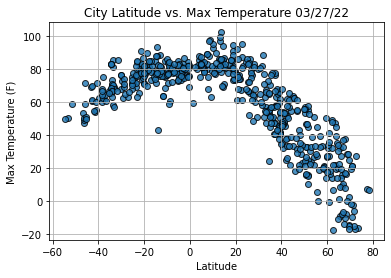

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

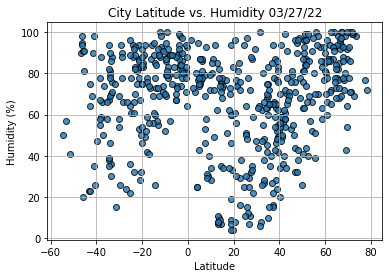

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

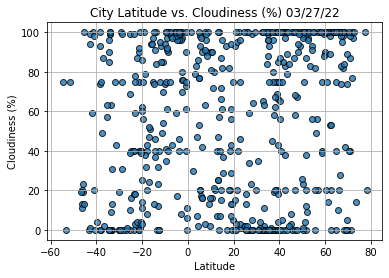

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

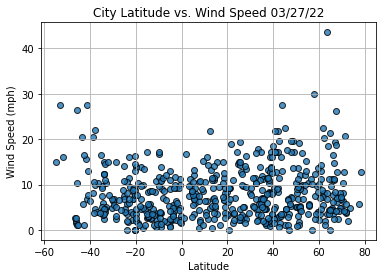

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [38]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [39]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [40]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

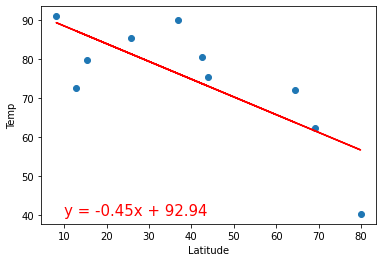

In [41]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
#Displaying output
index13 = city_data_df.loc[13]
index13

City          Vila Franca Do Campo
Country                         PT
Date           2022-03-27 18:21:02
Lat                        37.7167
Lng                       -25.4333
Max Temp                     63.01
Humidity                        78
Cloudiness                      19
Wind Speed                   13.22
Name: 13, dtype: object

In [44]:
# Displaying values of a row
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
551     True
552    False
553    False
554    False
555     True
Name: Lat, Length: 556, dtype: bool

In [45]:
# Displaying values of a row
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2022-03-27 18:20:57,77.4840,-69.3632,7.41,77,100,5.75
3,Yellowknife,CA,2022-03-27 18:20:58,62.4560,-114.3525,6.42,72,20,8.05
4,Dikson,RU,2022-03-27 18:20:59,73.5069,80.5464,-16.33,98,14,4.85
5,Saint-Augustin,CA,2022-03-27 18:20:59,51.2260,-58.6502,33.01,99,100,19.06
6,Norman Wells,CA,2022-03-27 18:18:50,65.2820,-126.8329,1.44,78,100,4.61
...,...,...,...,...,...,...,...,...,...
546,Pevek,RU,2022-03-27 18:24:21,69.7008,170.3133,-17.23,100,89,7.16
549,Komsomolskiy,UZ,2022-03-27 18:24:22,40.4272,71.7189,45.32,70,56,4.61
550,San Quintin,MX,2022-03-27 18:24:23,30.4833,-115.9500,65.01,63,35,7.67
551,Ati,TD,2022-03-27 18:24:23,13.2154,18.3353,82.09,8,25,11.39


In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

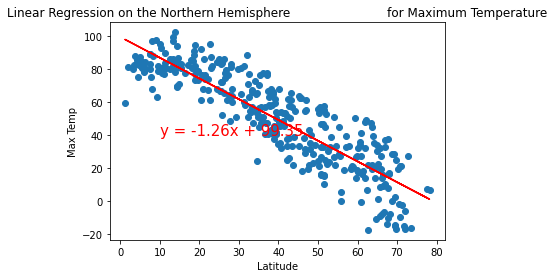

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

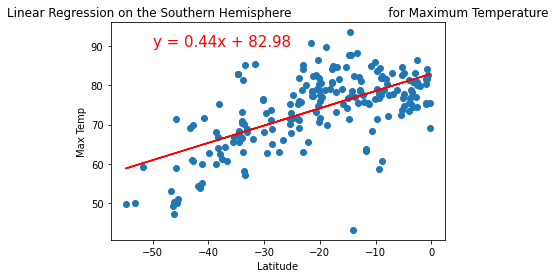

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

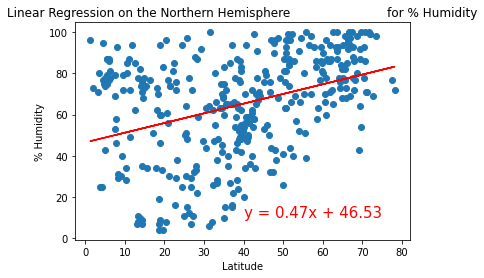

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15)

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_15720/1718544304.py, line 8)

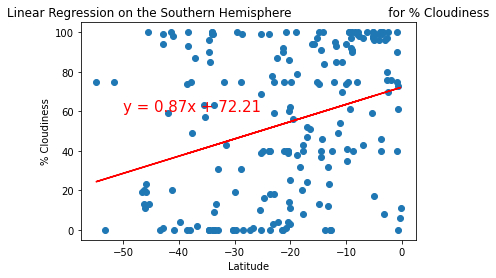

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

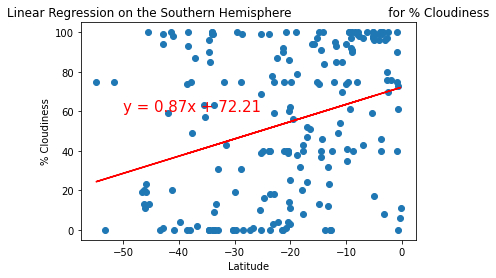

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

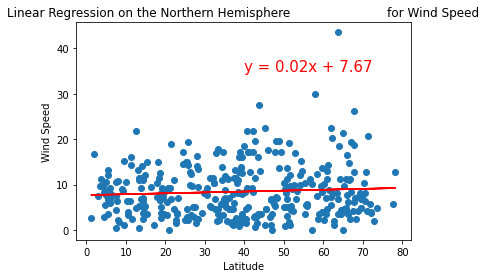

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

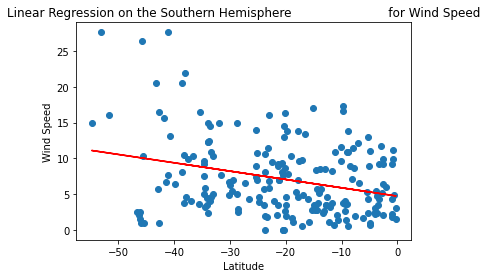

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [55]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")

city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Touros,BR,2022-03-27 18:20:57,-5.1989,-35.4608,84.61,67,97,13.00
1,1,Qaanaaq,GL,2022-03-27 18:20:57,77.4840,-69.3632,7.41,77,100,5.75
2,2,Avarua,CK,2022-03-27 18:20:58,-21.2078,-159.7750,82.45,78,75,6.91
3,3,Yellowknife,CA,2022-03-27 18:20:58,62.4560,-114.3525,6.42,72,20,8.05
4,4,Dikson,RU,2022-03-27 18:20:59,73.5069,80.5464,-16.33,98,14,4.85


In [56]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [57]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = city_data_df[["Lat", "Lng"]]

# 2. Assign the weights variable to some values.
max_temp = city_data_df["Max Temp"]

# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()
temperatures= abs(max_temp)

# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# 5. Add the heatmap layer.
fig.add_layer(heatmap_layer)

# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [58]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()
temperatures= abs(max_temp)

# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# 5. Add the heatmap layer.
fig.add_layer(heatmap_layer)

# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [59]:
# Another Possible solution to display

# 2. Prompt the user to enter minimum and maximum temperature criteria 
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []

for temp in max_temp:
    temps.append(max(temp, 0))
    
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])

# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [60]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

In [ ]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

In [ ]:
# Display the cities DF

preferred_cities_df.count()

In [ ]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

In [ ]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

In [ ]:
#Cleaning output

len(hotels["results"])

In [ ]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params = {
        "location": f"{lat},{lng}",
        "radius": 5000,
        "types" : "hotel",
        "key": g_key
    }

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name.
    #hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError): print("Hotel not found... skipping.")

In [ ]:
# Displaying Hotel Data frame
hotel_df.head()

In [ ]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

In [ ]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

In [ ]:
# The text inside the multiline string is HTML code. 
# HTML code is defined by the opening and closing the angular brackets (e.g., <tag> and <tag/>). 

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [ ]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig